# Estimating availability factors of hydropower plants in Quebec

This notebook documents the estimation of availability factors of hydropower plants in Quebec, used in the NATEM-Quebec model. They are based on monthly production data of hydropower made available by the Canadian government [CANSIM table 127-0002](http://www5.statcan.gc.ca/cansim/a34?lang=eng&mode=tableSummary&id=1270002&stByVal=2&p1=-1&p2=9)

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from calendar import monthrange

## Reading CANSIM monthly data on electricity by generator

the CANSIM data includes production from Hydro Quebec (HQP) but also industry

In [3]:
cansim_monthly=pd.read_csv('HQ data/cansim monthly electricity production quebec 2008-2013 -hq-industry.csv',
            header=[0,1],
            index_col=0,
            parse_dates=True,
            dayfirst=True,
            na_values='..' )

In [4]:
cansim_monthly.head()

producer                   Total                                 \
date       Hydraulic turbine (4) Conventional steam turbine (5)   
2008-08-01              13701243                          98323   
2008-09-01              12478219                          89795   
2008-10-01              13488685                          63368   
2008-11-01              14911686                          90789   
2008-12-01              18982856                         117618   

producer                                                              \
date       Nuclear steam turbine (6) Internal combustion turbine (7)   
2008-08-01                  370878.0                            8636   
2008-09-01                  421147.0                           18188   
2008-10-01                  436045.0                           20199   
2008-11-01                  440078.0                           23087   
2008-12-01                  459426.0                           28636   

producer                                                   \
date       Combustion turbine (8) Wind power turbine (10)   
2008-08-01                  14860                   23648   
2008-09-01                  14307                   29851   
2008-10-01                  15909                   42617   
2008-11-01                  18120                   34680   
2008-12-01                  23072                   40626   

producer                     HQP                                 \
date       Hydraulic turbine (4) Conventional steam turbine (5)   
2008-08-01              11648954                          53609   
2008-09-01              10828507                          46109   
2008-10-01              11912578                          28662   
2008-11-01              13232205                          48485   
2008-12-01              17370453                          83559   

producer                                                              \
date       Nuclear steam turbine (6) Internal combustion turbine (7)   
2008-08-01                  370878.0                            8636   
2008-09-01                  421147.0                           18188   
2008-10-01                  436045.0                           20199   
2008-11-01                  440078.0                           23087   
2008-12-01                  459426.0                           28636   

producer                                                   \
date       Combustion turbine (8) Wind power turbine (10)   
2008-08-01                  14860                   23648   
2008-09-01                  14307                   29851   
2008-10-01                  15909                   42617   
2008-11-01                  18120                   34680   
2008-12-01                  23072                   40626   

producer                industry                                 \
date       Hydraulic turbine (4) Conventional steam turbine (5)   
2008-08-01               2052289                          44714   
2008-09-01               1649712                          43686   
2008-10-01               1576107                          34706   
2008-11-01               1679481                          42304   
2008-12-01               1612403                          34059   

producer                                    
date       Internal combustion turbine (7)  
2008-08-01                             0.0  
2008-09-01                             0.0  
2008-10-01                             0.0  
2008-11-01                             0.0  
2008-12-01                             0.0

# Reading hydro installed capacity values (reservoir + run-of-river)

according to NATEM, we had an aggregated run-of-river (ROR) and reservoir installed capacity of

- 2011 : 38.67 GW
- 2012 : 39.59 GW (Eastmain 1-A and La sarcelle enter in operation)
- 2013 : 40.23 GW 
- 2014 : 40.23 GW (la Romaine 2 enters in operation)
- 2015 : 40.23 GW

wikipedia says eastmain 1A project had its first turbine operating in june 2011, and the other two between december 2011 and january 2012, so we can assume they were fully in operation in 2012.

## analysis of monthly data

### just work with Hydro-Quebec production

we have capacity values for 2011 onwards for Hydro-Quebec power plants. Thus we exclude data from private producers (a minor component of total production) and from years before 2011

In [5]:
HQP_cansim=cansim_monthly.loc['2011':,'HQP']

Add a column of installed capacity

In [6]:
HQP_cansim.loc[:,'installed capacity (MW)']=38670

HQP_cansim.loc['2012','installed capacity (MW)']=39590
HQP_cansim.loc['2013','installed capacity (MW)']=40230
HQP_cansim.loc['2014','installed capacity (MW)']=40230
HQP_cansim.loc['2015','installed capacity (MW)']=40230

### calculate the number of hours per month

In [7]:
nhours=[]
for year in range(2011,2016):
    for month in range(1,13):
        nhours.append((monthrange(year,month)[1]*24))


In [8]:
HQP_cansim['nhours']=pd.Series(nhours).values

In [9]:
HQP_cansim.loc[:,'CF hydro']=HQP_cansim['Hydraulic turbine (4)']/HQP_cansim['installed capacity (MW)']/HQP_cansim['nhours']

Divide total electricity production per month by the number of hours per month and the installed capacity, to get an approximation of the availability factor 

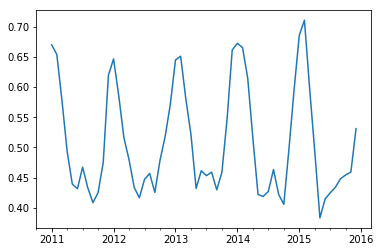

In [11]:
HQP_cansim['CF hydro'].plot();

In [12]:
for years in range (2011,2015):
    print ('average CF in the year ',years,' ', round(HQP_cansim.loc[str(years),'CF hydro'].mean(),2))
    print ('maximum CF in the year ',years,' ', round(HQP_cansim.loc[str(years),'CF hydro'].max(),2))
    print('')

average CF in the year  2011   0.51
maximum CF in the year  2011   0.67

average CF in the year  2012   0.5
maximum CF in the year  2012   0.65

average CF in the year  2013   0.53
maximum CF in the year  2013   0.66

average CF in the year  2014   0.51
maximum CF in the year  2014   0.67



This estimate is the total production divided by the capacity. We need to correct the AF taking into account the efficiency of the hydro power plant (97% in NATEM). Therefore an average AF of 0.51 (the value during the calibration year) divided by the efficiency gives an annual availability factor of 0.53

In [13]:
round((0.51/0.97),2)

0.53

This would be an average of run-of-river and reservoir hydro power plants. To the best of our knowledge there is not much data available on the CF of Hydro Quebec's power plants. HQ *Environmental Impact Assessments* of Run-of-river projects estimate "gross capacity factors" (i.e. annual production / capacity) above the average value found here (e.g. [Chute-Allard and Rapides-des-coeurs](http://www.bape.gouv.qc.ca/sections/mandats/chute-allard/documents/pr3/crcEI_Volume1_040521.pdf)). there is no reason why capacity factors of run-of-river would be higher than reservoir plants, Therefore we have used the same value for both types.